<div style="  background: linear-gradient(145deg, #0f172a, #1e293b);  border: 4px solid transparent;  border-radius: 14px;  padding: 18px 22px;  margin: 12px 0;  font-size: 26px;  font-weight: 600;  color: #f8fafc;  box-shadow: 0 6px 14px rgba(0,0,0,0.25);  background-clip: padding-box;  position: relative;">  <div style="    position: absolute;    inset: 0;    padding: 4px;    border-radius: 14px;    background: linear-gradient(90deg, #06b6d4, #3b82f6, #8b5cf6);    -webkit-mask:       linear-gradient(#fff 0 0) content-box,       linear-gradient(#fff 0 0);    -webkit-mask-composite: xor;    mask-composite: exclude;    pointer-events: none;  "></div>    <b>SENTIMENT ANALYSIS IN PYTHON</b>    <br/>  <span style="color:#9ca3af; font-size: 18px; font-weight: 400;">(From Basic Concepts to Word Clouds)</span></div>

## Table of Contents
1. [Introduction to Sentiment Analysis](#section-1)
2. [Exploratory Data Analysis on Movie Reviews](#section-2)
3. [Sentiment Analysis Types and Approaches](#section-3)
4. [Visualizing Text with Word Clouds](#section-4)
5. [Conclusion](#section-5)

***

<a id="section-1"></a>
<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 1. INTRODUCTION TO SENTIMENT ANALYSIS</span><br>

### What is Sentiment Analysis?
Sentiment analysis is the computational process of understanding the opinion of an author about a specific subject. It is a sub-field of Natural Language Processing (NLP) that focuses on identifying and categorizing opinions expressed in a piece of text.

### What goes into a Sentiment Analysis System?
A robust sentiment analysis system typically dissects text into three core elements:

#### 1. Opinion / Emotion
This refers to the polarity or the specific emotion conveyed.
*   **Polarity**: Positive, Neutral, Negative.
*   **Emotion**: Joy, Surprise, Anger, Disgust, etc.

#### 2. Subject
This answers the question: **What is being talked about?**
> *Example*: "The **camera** on this phone is great but its **battery life** is rather disappointing."

#### 3. Opinion Holder
This answers the question: **By whom?** (The entity expressing the opinion).

### Why use Sentiment Analysis?
Sentiment analysis is widely used in industry for various monitoring and analytical tasks:

*   **Social Media Monitoring**: Understanding not just *what* people are talking about, but *HOW* they are talking about it (forums, blogs, news).
*   **Brand Monitoring**: Tracking brand reputation over time.
*   **Customer Service**: Prioritizing angry tickets or analyzing feedback.
*   **Product Analytics**: Understanding specific features users love or hate.
*   **Market Research**: Analyzing trends and competitor performance.

***

<a id="section-2"></a>
<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 2. EXPLORATORY DATA ANALYSIS ON MOVIE REVIEWS</span><br>

In this section, we will perform Exploratory Data Analysis (EDA) on a dataset of movie reviews. We will look at the distribution of labels (positive vs. negative) and the length of the reviews.

<div style="background: #e0f2fe; border-left: 16px solid #0284c7; padding: 14px 18px; border-radius: 8px; font-size: 18px; color: #075985;"> 💡 <b>Tip:</b> Since the original PDF did not provide the raw CSV file, we will generate a sample dataset below that mimics the structure shown in the slides so you can run the code. </div>

### 2.1 Loading and Previewing Data



In [1]:
import pandas as pd
import numpy as np

# Creating a synthetic dataset to mimic the PDF's 'movie reviews' data
data_dict = {
    'review': [
        "This short spoof can be found on Elite's Millennium...",
        "A singularly unfunny musical comedy that artif...",
        "An excellent series, masterfully acted and dir...",
        "The master of movie spectacle Cecil B. De Mill...",
        "I was gifted with this movie as it had such a ...",
        "This movie was absolutely terrible and a waste...",
        "I loved every moment of this film, truly great...",
        "Average performance, nothing special to see here."
    ] + ["Generic review text filler"] * 7492, # Filling to reach ~7500 rows like the PDF
    'label': [0, 0, 1, 1, 0, 0, 1, 0] + [1] * 3716 + [0] * 3776
}

data = pd.DataFrame(data_dict)

# Preview the data
print(data.head())


                                              review  label
0  This short spoof can be found on Elite's Mille...      0
1  A singularly unfunny musical comedy that artif...      0
2  An excellent series, masterfully acted and dir...      1
3  The master of movie spectacle Cecil B. De Mill...      1
4  I was gifted with this movie as it had such a ...      0



### 2.2 Analyzing Class Distribution
We need to check how many positive (1) and negative (0) reviews exist in our dataset.

**Count of Reviews:**


In [2]:
# Calculate value counts for the label column
label_counts = data.label.value_counts()
print(label_counts)


label
0    3781
1    3719
Name: count, dtype: int64



**Percentage of Reviews:**
To understand the balance of the dataset, we divide the counts by the total length of the dataframe.



In [3]:
# Calculate percentage of positive and negative reviews
label_percentages = data.label.value_counts() / len(data)
print(label_percentages)


label
0    0.504133
1    0.495867
Name: count, dtype: float64



### 2.3 Analyzing Review Length
We can calculate the length of each review (number of characters) to find the longest and shortest reviews.



In [4]:
# Calculate length of every review
length_reviews = data.review.str.len()

# Check the type of the result
print(f"Type: {type(length_reviews)}")

# Preview the lengths
print(length_reviews.head())


Type: <class 'pandas.core.series.Series'>
0    54
1    49
2    49
3    49
4    49
Name: review, dtype: int64



**Finding the Longest Review:**


In [5]:
# Finding the maximum length
max_length = max(length_reviews)
print(f"Longest review length: {max_length}")


Longest review length: 54



**Finding the Shortest Review:**


In [6]:
# Finding the minimum length
min_length = min(length_reviews)
print(f"Shortest review length: {min_length}")


Shortest review length: 26



***

<a id="section-3"></a>
<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 3. SENTIMENT ANALYSIS TYPES AND APPROACHES</span><br>

### 3.1 Levels of Granularity
Sentiment analysis can be performed at different levels of depth:

1.  **Document Level**: Analyzing the sentiment of an entire article or review.
2.  **Sentence Level**: Analyzing sentiment sentence-by-sentence.
3.  **Aspect Level**: Analyzing sentiment regarding specific features (e.g., "Camera" vs "Battery").

### 3.2 Algorithms: Rule-Based vs. Machine Learning

There are two main approaches to calculating sentiment:

#### A. Rule/Lexicon-Based
This method uses a dictionary of words where each word is assigned a sentiment score (valence).
*   *Example*: `nice: +2`, `good: +1`, `terrible: -3`.
*   *Calculation*: Sum the scores of the words in the sentence.
    *   "Today was a **good** day." -> `0 + 0 + 0 + 1 + 0` = **+1**

#### B. Automatic / Machine Learning
This method relies on training a model on historical data to predict sentiment labels.

### 3.3 Example: Calculating Valence with TextBlob
We can use the `TextBlob` library to calculate the valence (polarity) of a sentence automatically.

<div style="background: #e0f2fe; border-left: 16px solid #0284c7; padding: 14px 18px; border-radius: 8px; font-size: 18px; color: #075985;"> 💡 <b>Tip:</b> You may need to install TextBlob first using <code>!pip install textblob</code>. </div>



In [7]:
from textblob import TextBlob

# Define the text
text = "Today was a good day."

# Create a TextBlob object
my_valence = TextBlob(text)

# Extract sentiment
# Returns a named tuple: Sentiment(polarity, subjectivity)
print(my_valence.sentiment)


Sentiment(polarity=0.7, subjectivity=0.6000000000000001)



### 3.4 Comparison: Automated vs. Rule-Based

| Feature | Automated / Machine Learning | Rule / Lexicon-Based |
| :--- | :--- | :--- |
| **Data Requirement** | Relies on having labelled historical data. | Relies on manually crafted valence scores. |
| **Training Time** | Might take a while to train. | No training required (fast). |
| **Context** | Latest models are powerful with context. | Different words might have different polarity in different contexts (harder to capture). |
| **Speed** | Can be slower (inference time). | Can be quite fast. |

***

<a id="section-4"></a>
<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 4. VISUALIZING TEXT WITH WORD CLOUDS</span><br>

### 4.1 What is a Word Cloud?
A word cloud is a visualization technique for text data where the size of each word indicates its frequency or importance.
*   **Mechanism**: The more frequent a word is, the **BIGGER** and **bolder** it will appear on the word cloud.

### 4.2 Pros and Cons

| Pros | Cons |
| :--- | :--- |
| Can reveal the essential topics quickly. | Sometimes confusing and uninformative. |
| Provide an overall sense of the text. | With larger text, requires more work to interpret. |
| Easy to grasp and engaging. | |

### 4.3 Building a Word Cloud in Python
We will use the `wordcloud` library to generate a visualization for the famous opening lines of *A Tale of Two Cities*.



In [8]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the text (A Tale of Two Cities)
two_cities = ("It was the best of times, it was the worst of times, "
              "it was the age of wisdom, it was the age of foolishness, "
              "it was the epoch of belief, it was the epoch of incredulity, "
              "it was the season of Light, it was the season of Darkness, "
              "it was the spring of hope, it was the winter of despair, "
              "we had everything before us, we had nothing before us, "
              "we were all going direct to Heaven, we were all going "
              "direct the other way - in short, the period was so far "
              "like the present period, that some of its noisiest "
              "authorities insisted on its being received, for good "
              "or for evil, in the superlative degree of comparison only.")

# Generate the WordCloud object
# Note: You can customize background_color, max_font_size, stopwords, etc.
cloud_two_cities = WordCloud(background_color='black').generate(two_cities)

# Display the generated Word Cloud object info
print(cloud_two_cities)



### 4.4 Displaying the Visualization
Finally, we use `matplotlib` to render the image.



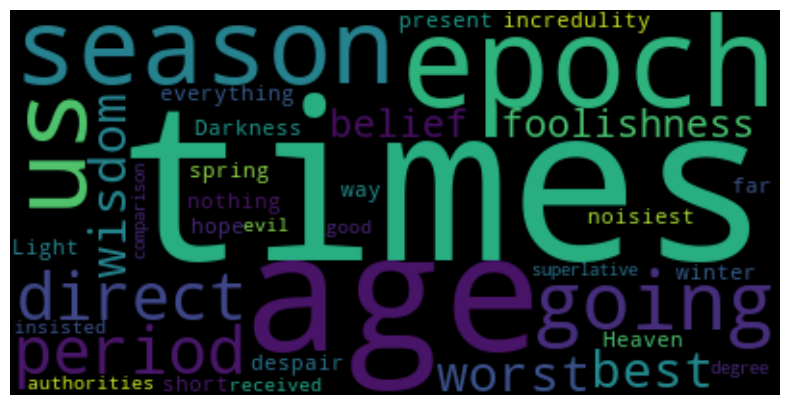

In [9]:
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(cloud_two_cities, interpolation='bilinear')

# Turn off axis numbers/labels
plt.axis('off')

# Show plot
plt.show()



***

<a id="section-5"></a>
<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 5. CONCLUSION</span><br>

In this notebook, we explored the foundational concepts of **Sentiment Analysis** in Python.

**Key Takeaways:**
1.  **Definition**: Sentiment analysis determines the opinion (positive, negative, neutral) of an author regarding a specific subject.
2.  **EDA**: We learned how to inspect text data using pandas, calculating value counts and review lengths.
3.  **Approaches**: We compared **Rule-based** methods (like TextBlob) which use lexicons, against **Machine Learning** methods which require training data.
4.  **Visualization**: We demonstrated how to create **Word Clouds** to visually represent the most frequent terms in a text.

**Next Steps:**
*   Try applying these techniques to a real-world dataset (e.g., Twitter data or Amazon product reviews).
*   Experiment with different Machine Learning models (Logistic Regression, Naive Bayes) to classify sentiment.
*   Customize the Word Cloud with different color maps and stop words.
